# dependencias

In [16]:
import pandas as pd
import os
import sys
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import scipy.stats as stats
import utilidades as ut
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

# lectura de datos 

In [2]:
datos_men = pd.read_csv('../input/data_final.csv').drop(columns=['Unnamed: 0'])

In [3]:
datos_men.head()

,year,month,pro_inter_violen,pro_homicidios,pro_max_temp,pro_humedad,num_festivos,pro_multas,pro_indice,pro_inter_violen_est,pro_homicidios_est,pro_multas_est,indice_crimen
0,2010,1,8.709677,1.322581,32.677419,77.387097,2,5.709677,30.811561,-0.857756,1.458936,0.668157,0.044714
1,2010,2,9.250000,0.607143,33.285714,77.892857,5,5.250000,31.976243,-0.490522,-1.794155,0.445183,-0.326085
2,2010,3,8.612903,0.774194,34.741935,78.129032,4,4.258065,34.924968,-0.923529,-1.034577,-0.035971,-0.849534
3,2010,4,9.400000,0.966667,34.700000,79.933333,4,5.166667,35.033153,-0.388574,-0.159403,0.404761,-0.034178
4,2010,5,9.548387,1.193548,34.000000,80.806452,2,4.580645,35.165313,-0.287722,0.872227,0.120502,0.002819


In [4]:
datos = datos_men.drop(columns=['year', 'month', 'pro_inter_violen', 'pro_homicidios', 'pro_multas', 'pro_inter_violen_est', 'pro_homicidios_est', 'pro_multas_est'])

In [5]:
datos_men.columns

Index(['year', 'month', 'pro_inter_violen', 'pro_homicidios', 'pro_max_temp',
       'pro_humedad', 'num_festivos', 'pro_multas', 'pro_indice',
       'pro_inter_violen_est', 'pro_homicidios_est', 'pro_multas_est',
       'indice_crimen'],
      dtype='object')

In [6]:
datos.head(10)

,pro_max_temp,pro_humedad,num_festivos,pro_indice,indice_crimen
0,32.677419,77.387097,2,30.811561,0.044714
1,33.285714,77.892857,5,31.976243,-0.326085
2,34.741935,78.129032,4,34.924968,-0.849534
3,34.700000,79.933333,4,35.033153,-0.034178
4,34.000000,80.806452,2,35.165313,0.002819
5,33.033333,85.533333,2,33.936063,-1.201738
6,33.096774,87.645161,2,32.886171,-1.401599
7,33.064516,85.516129,2,32.960326,-1.461343
8,32.633333,86.966667,0,31.630967,-1.670860
9,32.741935,87.322581,1,32.249113,-1.022520


c:\Users\bcriv\OneDrive\Escritorio\semestre 2024-2\series de tiempo\Proyecto Final Python\Series_de_tiempo\src\utilidades.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=f'{start_year}-01-01', periods=len(data), freq=freq)


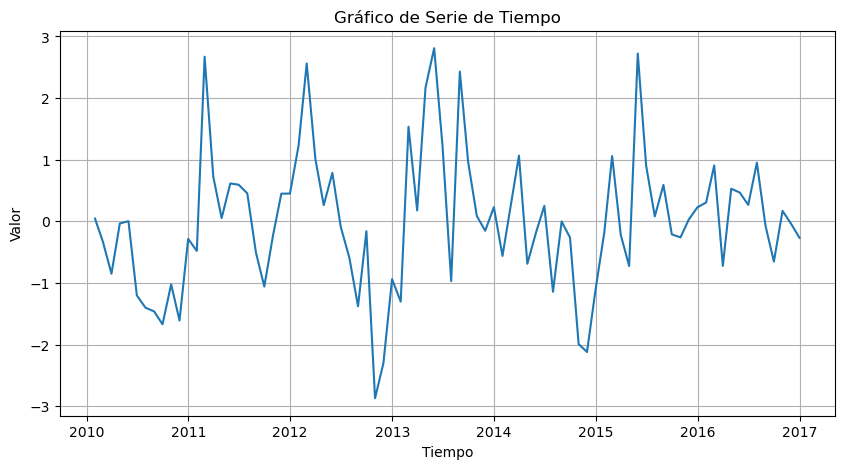

In [7]:
ut.plot_time_series(datos_men['indice_crimen'], 2010, 'M')

In [8]:
datos['indice_crimen_lag_1'] = datos['indice_crimen'].shift(1)
datos

,pro_max_temp,pro_humedad,num_festivos,pro_indice,indice_crimen,indice_crimen_lag_1
0,32.677419,77.387097,2,30.811561,0.044714,NaN
1,33.285714,77.892857,5,31.976243,-0.326085,0.044714
2,34.741935,78.129032,4,34.924968,-0.849534,-0.326085
3,34.700000,79.933333,4,35.033153,-0.034178,-0.849534
4,34.000000,80.806452,2,35.165313,0.002819,-0.034178
...,...,...,...,...,...,...
79,34.290323,78.741935,2,35.006229,-0.072539,0.951996
80,33.566667,83.833333,0,34.276690,-0.653121,-0.072539
81,32.870968,86.580645,0,32.375942,0.169338,-0.653121
82,32.500000,87.133333,2,31.981063,-0.034589,0.169338


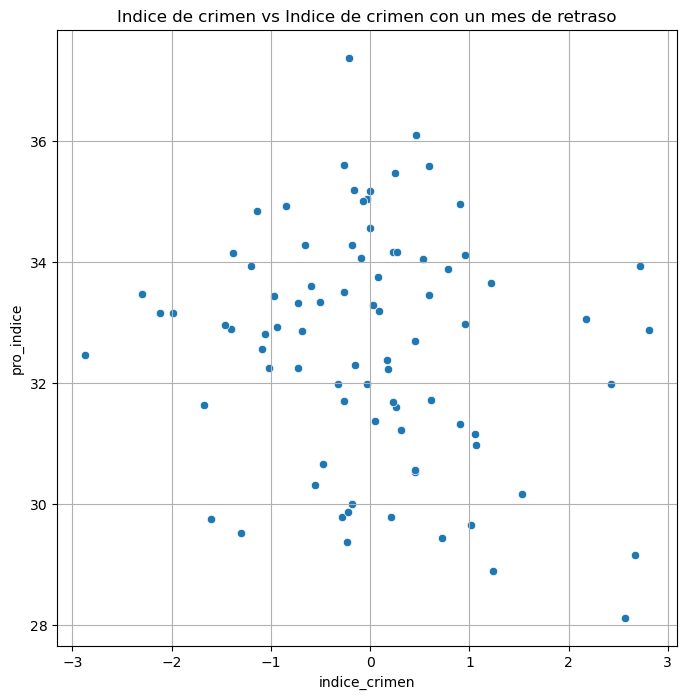

Correlacion de Pearson:  PearsonRResult(statistic=-0.17204062637182826, pvalue=0.11989487901168319)
Correlacion de Spearman:  SignificanceResult(statistic=-0.12096469501700179, pvalue=0.27600681060000604)


In [9]:
# funcion de grafico de dispersion con correlacion de pearson y spearman
def plot_scatter(data, x, y, title):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()
    print('Correlacion de Pearson: ', stats.pearsonr(data[x], data[y]))
    print('Correlacion de Spearman: ', stats.spearmanr(data[x], data[y]))

plot_scatter(datos.iloc[1:], 'indice_crimen', 'pro_indice', 'Indice de crimen vs Indice de crimen con un mes de retraso')


In [10]:
## funcion para generar resagos

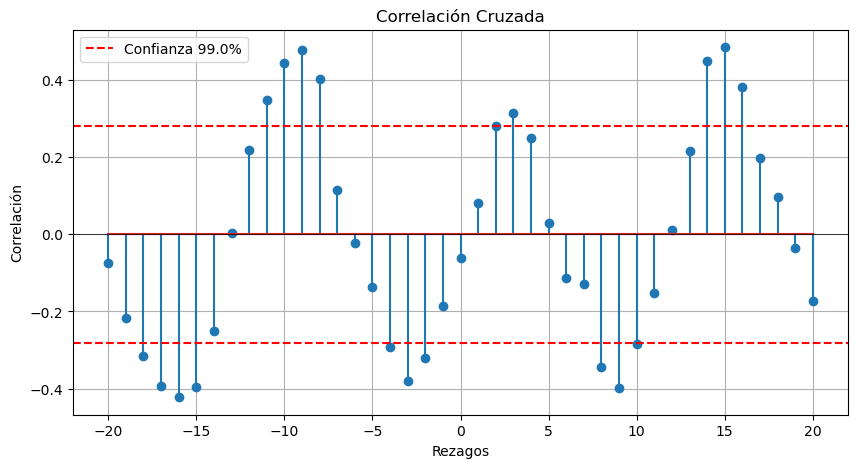

In [11]:
ut.plot_cross_correlation(datos_men['indice_crimen'], datos_men['pro_max_temp'], max_lags=20, alpha=0.01)

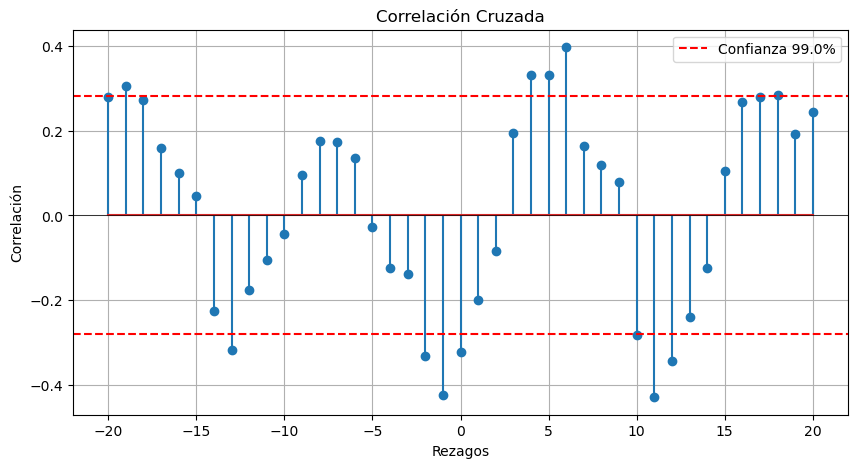

In [13]:
ut.plot_cross_correlation(datos_men['indice_crimen'], datos_men['pro_humedad'], max_lags=20, alpha=0.01)

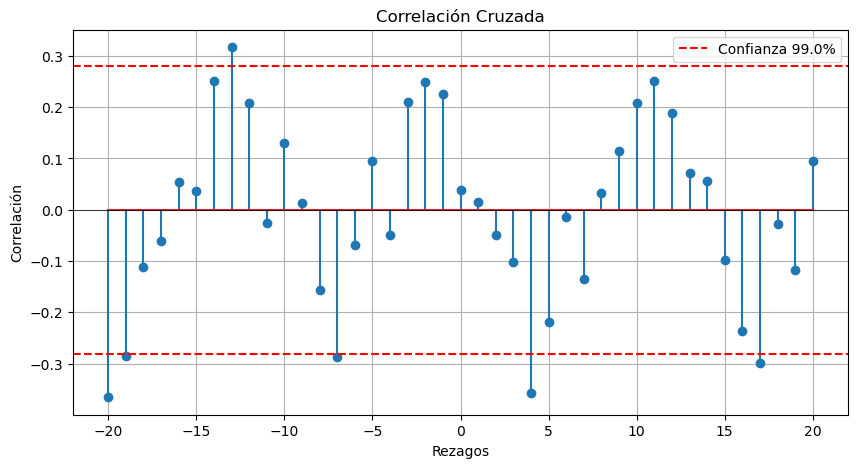

In [14]:
ut.plot_cross_correlation(datos_men['indice_crimen'], datos_men['num_festivos'], max_lags=20, alpha=0.01)

In [22]:
## dickey fuller test de statsmodels
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(datos['indice_crimen'])

In [23]:
resultado[1]

9.830960935115299e-05

la series es estacionaria

# modelamiento

para el modelamiento se van a probar dos metodologias LSTM que es un modelo el cual permite manejar diferentes variables ademas de mirar no tener problemas con con la no linealidad de los datos